In [1]:
suppressMessages(suppressWarnings(library(karyoploteR)))
suppressMessages(suppressWarnings(library(rtracklayer)))
suppressMessages(suppressWarnings(library(readr)))
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(tidyr)))
suppressMessages(suppressWarnings(library(tibble)))
suppressMessages(suppressWarnings(library(pheatmap)))
suppressMessages(suppressWarnings(library(viridis)))
suppressMessages(suppressWarnings(library(tidyr)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(forcats)))
suppressMessages(suppressWarnings(library(stringr)))
suppressMessages(suppressWarnings(library(RColorBrewer)))
suppressMessages(suppressWarnings(library(UpSetR)))


In [2]:
# inputs

fai_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/resources/genome/Rhodnius_prolixus-3.0.3_HiC.fasta.fai"


cluster_files <- c(
    "pvs" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/pvs.clusters.nomir.bed",
    "egg" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/egg.clusters.nomir.bed",
    "emb" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/emb.clusters.nomir.bed",
    "nym" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/nym.clusters.nomir.bed"
)

all_clusters_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.bed"

clusters_final_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.final.tsv"

clusters_count_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.counts.tsv"

scalling_factors_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/bamCoverage_dir/scallingFactors.tsv"

clusters_TEs_files <- c(
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL10.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL1.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL2.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL3.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL4.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL5.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL6.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL7.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL8.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL9.TEs.count.tsv"
)


## Karyoplot

In [3]:
fai <- read_tsv(fai_file, 
                col_names = FALSE)
fai <- fai %>%  mutate(s=(0*X2)+1) %>% select(X1,s,X2)

custom_genome <- toGRanges(fai %>% as.data.frame)
custom_genome[c(1:11),]

Rows: 17755 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1
dbl (4): X2, X3, X4, X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


GRanges object with 11 ranges and 0 metadata columns:
            seqnames     ranges strand
               <Rle>  <IRanges>  <Rle>
   1  HiC_scaffold_1 1-47232656      *
   2  HiC_scaffold_2 1-45634076      *
   3  HiC_scaffold_3 1-48117738      *
   4  HiC_scaffold_4 1-38674490      *
   5  HiC_scaffold_5 1-45773795      *
   6  HiC_scaffold_6 1-69096158      *
   7  HiC_scaffold_7 1-56613900      *
   8  HiC_scaffold_8 1-64323523      *
   9  HiC_scaffold_9 1-45655803      *
  10 HiC_scaffold_10 1-45755482      *
  11 HiC_scaffold_11 1-55035022      *
  -------
  seqinfo: 17755 sequences from an unspecified genome; no seqlengths

In [4]:
options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res = 150)

clusters <- lapply(cluster_files, import)

plot.params <- getDefaultPlotParams(plot.type=6)
plot.params$ideogramheight <- 100
plot.params$data1outmargin <- 100


u <- 0.25

bg <- 0 + (4 * u)
p <- 0 + (3 * u) 
g <- 0 + (2 * u)
m <- 0 + (1 * u)
n <- 0 + (0 * u)

png("images/karyoplot_stages.png", width=1000, height = 600)
kp <- plotKaryotype(genome = custom_genome, chromosomes = fai$X1[c(1:11)], plot.type = 6, plot.params=plot.params)
kpDataBackground(kp, color = "grey90")
kpAbline(kp, h=p+u)
kpPlotRegions(kp, data=clusters[["pvs"]], r0=p, r1=p+u, col = "purple")
kpAbline(kp, h=p)
kpPlotRegions(kp, data=clusters[["egg"]], r0=g, r1=g+u, col = "blue")
kpAbline(kp, h=g)
kpPlotRegions(kp, data=clusters[["emb"]], r0=m, r1=m+u, col = "darkgreen")
kpAbline(kp, h=m)
kpPlotRegions(kp, data=clusters[["nym"]], r0=n, r1=n+u, col = "red")
kpAbline(kp, h=n)
kpAddBaseNumbers(kp, tick.dist = 10000000, tick.len = 10, tick.col="red", cex=1,
                 minor.tick.dist = 1000000, minor.tick.len = 5, minor.tick.col = "black")


dev.off()

png 
  2

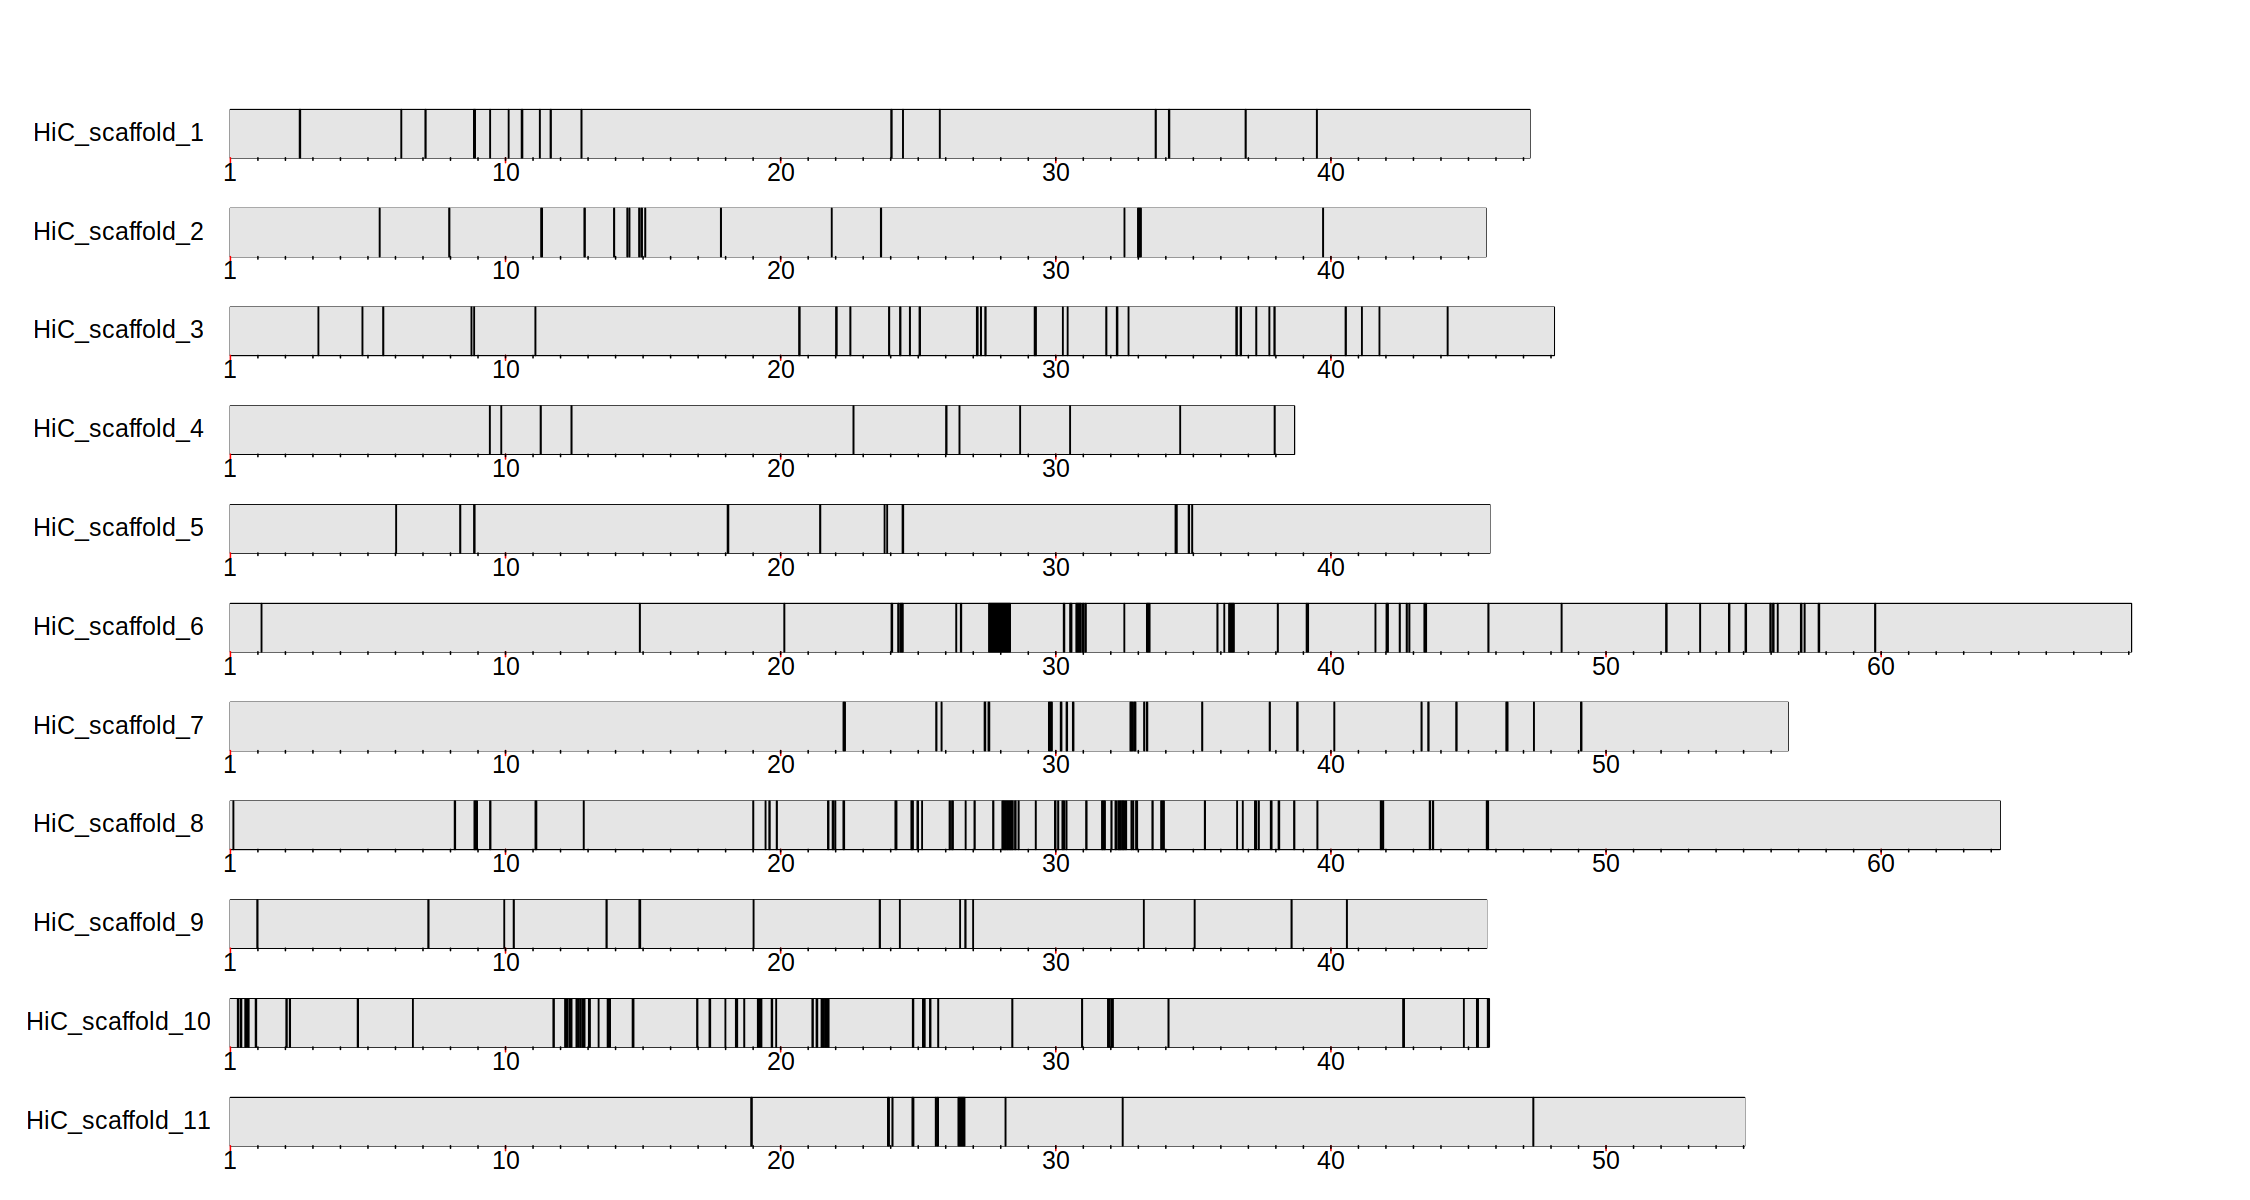

In [5]:
all_clusters <- import(all_clusters_file)

all_clusters <- all_clusters %>% 
    as.data.frame %>% 
    filter(as.numeric(name) > 10000) %>% 
    makeGRangesFromDataFrame


plot.params <- getDefaultPlotParams(plot.type=6)
plot.params$ideogramheight <- 100
plot.params$data1outmargin <- 100

kp <- plotKaryotype(genome = custom_genome, chromosomes = fai$X1[c(1:11)], plot.type = 6, plot.params=plot.params)
kpDataBackground(kp, color = "grey90")
kpPlotRegions(kp, data=all_clusters)
kpAddBaseNumbers(kp, tick.dist = 10000000, tick.len = 10, tick.col="red", cex=1,
                 minor.tick.dist = 1000000, minor.tick.len = 5, minor.tick.col = "black")
# dev.off()

## Heatmaps

In [6]:
clusters_final <- suppressMessages(read_tsv(clusters_final_file))
head(clusters_final)
# clusters_final %>% filter(name %in% clusters_0)

chr,start,end,length,name,mean_rpm,type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
HiC_scaffold_6,27568000,28344000,776000,RPCL1,25313.7598,uni:neg
HiC_scaffold_11,26455000,26688000,233000,RPCL2,20782.1687,dual
HiC_scaffold_6,36293000,36479000,186000,RPCL3,302.7587,dual
HiC_scaffold_6,30741000,30916000,175000,RPCL4,274.1347,dual
HiC_scaffold_10,19165000,19307000,142000,RPCL5,2571.9889,dual
HiC_scaffold_10,21613000,21749000,136000,RPCL6,4516.4210,uni:pos


In [7]:
# ggplot(clusters_final, aes(y = log10(length), x = 1)) + geom_violin()

In [8]:
counts <- suppressMessages(read_tsv(clusters_count_file))
names(counts) <- gsub("\'|#|.sorted.uniquely.bam", "", names(counts))
clusters <- left_join(counts, clusters_final, by = c("chr", "start", "end"))

clusters_norm <- clusters
scale_factors <- suppressMessages(read_tsv(scalling_factors_file))
for(i in 1:length(scale_factors$sample)){
    sample <- scale_factors$sample[i]
    sf <- as.numeric(scale_factors[i,2])
    # print(clusters[sample])
    snorm <- sapply(clusters[sample], function(x) {x * sf})
    clusters_norm[sample] <- snorm
}


In [9]:
clusters_norm$length <- as.numeric(clusters_norm$length)

cl_norm_mat <- clusters_norm %>% 
    arrange(desc(length)) %>% 
    select(name, pvs1, pvs2, egg1, egg2, emb1, emb2, nym1, nym2) %>% 
    as.data.frame %>% 
    column_to_rownames("name")
cl_norm_mat[c(1:10),]


,pvs1,pvs2,egg1,egg2,emb1,emb2,nym1,nym2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPCL1,5646.217217,9127.14988,5160.90726,50654.4094,54141.8387,58293.5068,13191.736739,6294.312566
RPCL2,4672.750051,6816.95172,7309.17925,44537.4005,35331.1492,36823.2692,21006.563456,9760.086251
RPCL3,109.269469,165.27760,98.92073,688.5115,600.0840,695.2735,40.232931,24.499513
RPCL4,107.385513,161.24363,53.03974,516.4816,633.4155,687.6939,21.196890,12.620961
RPCL5,557.920220,1091.01655,559.79156,5876.2652,5626.1290,6679.8710,123.751420,61.166292
RPCL6,726.130609,1593.64947,707.73880,8215.4790,11773.9360,12772.2927,226.820438,115.320939
RPCL7,9.688918,18.90204,18.98150,121.6462,122.2646,137.2705,3.807208,2.103494
RPCL8,1802.138829,2363.56185,2966.75428,15876.0515,14676.2599,15135.1695,13563.917077,6014.589171
RPCL9,34.449488,43.45164,28.96035,193.7909,208.4696,234.2285,8.540494,4.825662


In [10]:
# clusters_norm[rowMeans(clusters_norm) == 0,]

In [11]:

# clusters_0 <- cl_norm_mat %>% 
#     rownames_to_column("cluster") %>% 
#     pivot_longer(cols = all_of(samples), names_to = "sample", values_to = "counts") %>% 
#     group_by(cluster) %>% 
#     summarize(mean=mean(counts)) %>% 
#     filter(mean == 0) %>% 
#     select(cluster) %>% 
#     pull

# clusters_final %>% filter(name %in% clusters_0)

png 
  2

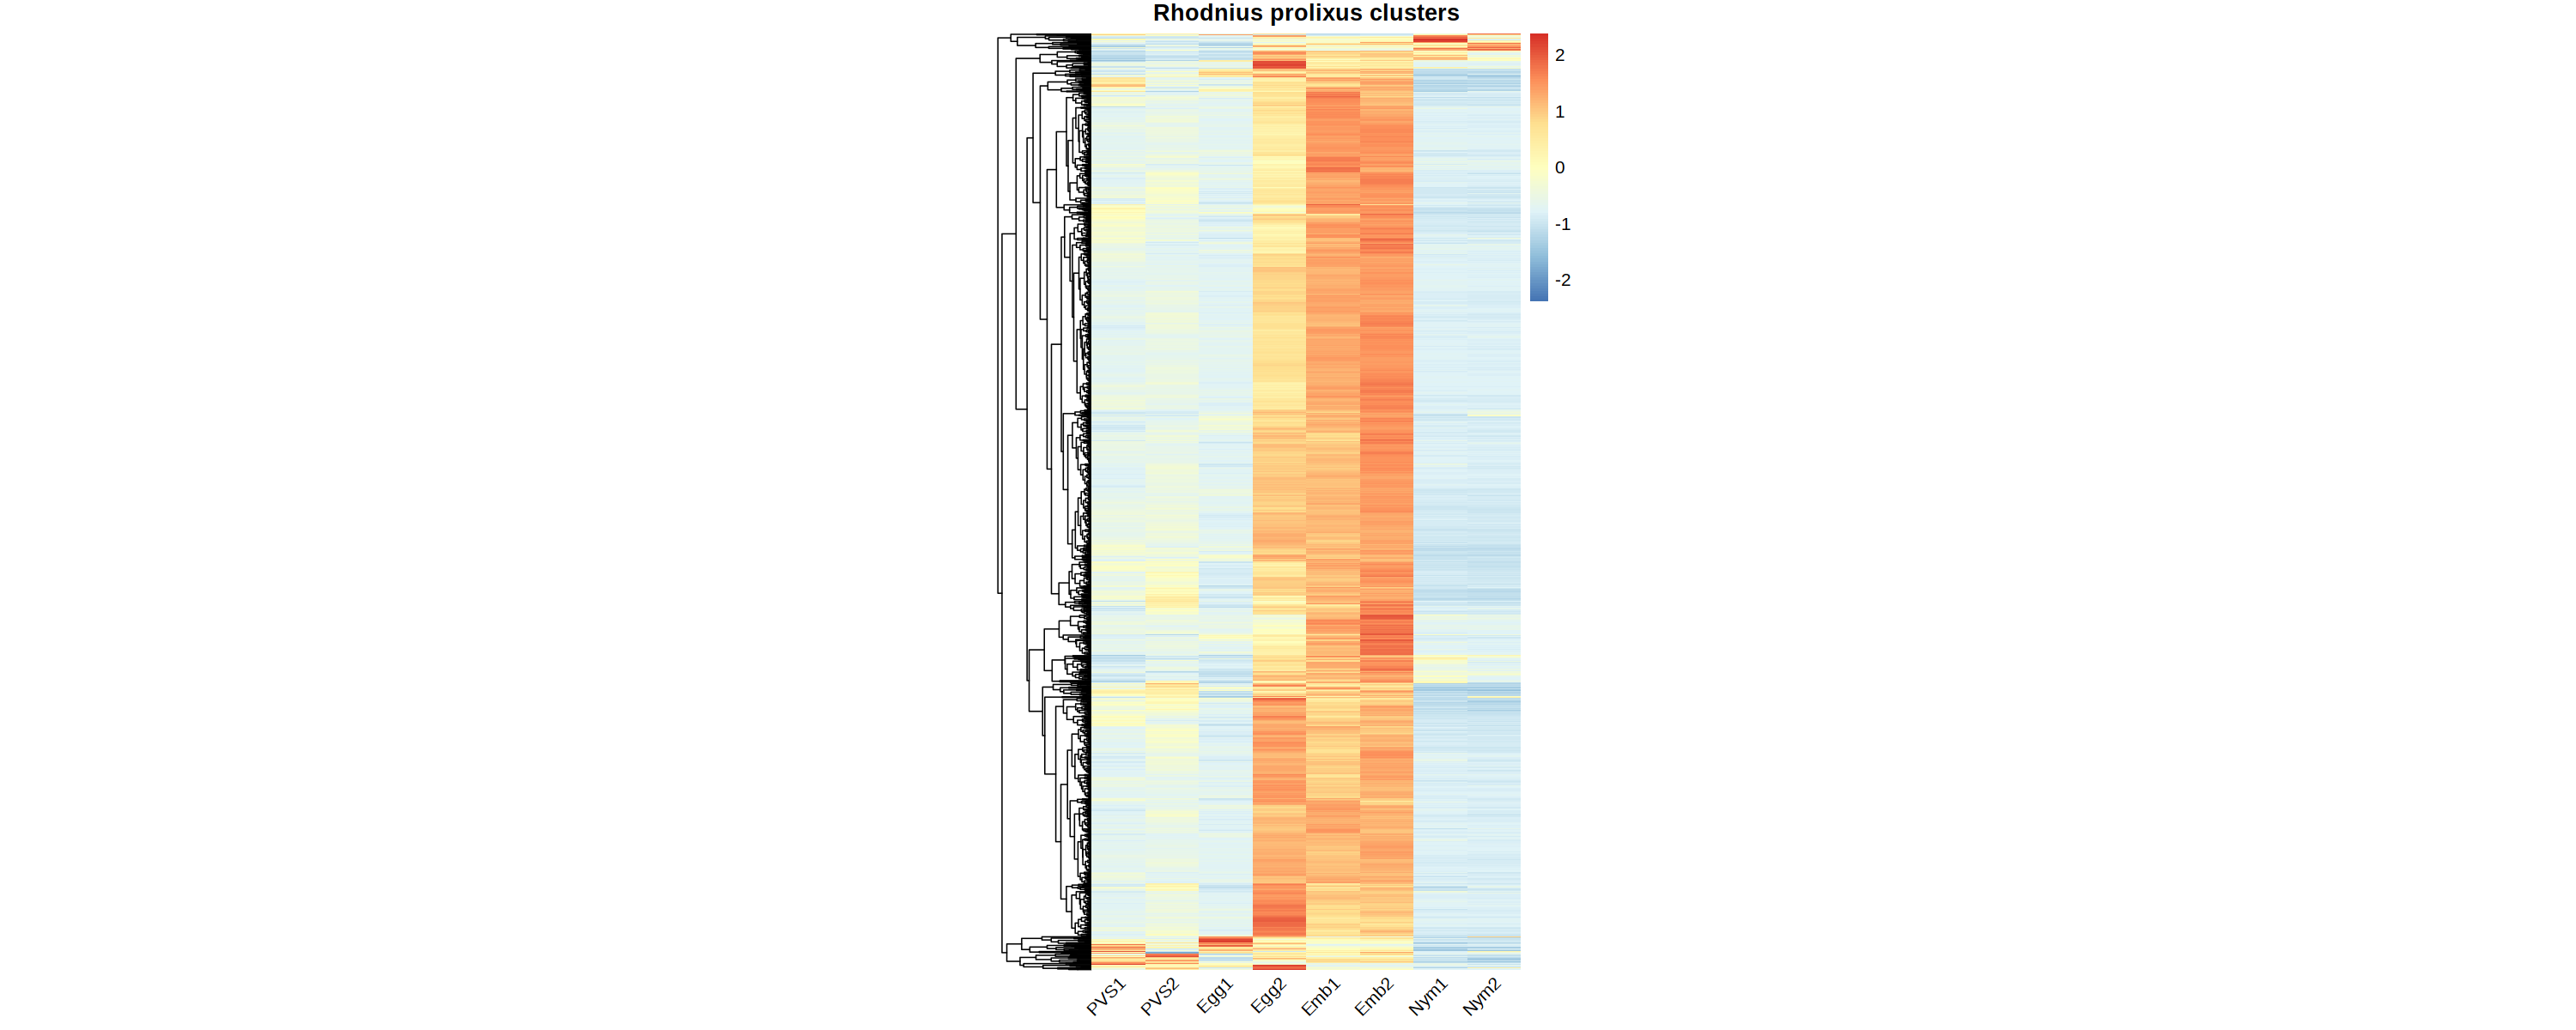

In [12]:
options(repr.plot.width = 20, repr.plot.height = 8, repr.plot.res = 150)

p <- pheatmap(cl_norm_mat,
         main = "Rhodnius prolixus clusters",
         show_rownames = FALSE,
         cluster_cols = FALSE,
         cluster_rows = TRUE,
         scale = "row",
         cellwidth = 30,
        #  color = plasma(50),
         silent = TRUE,
         # breaks = c(-2,0,2),
         labels_col = c("PVS1", "PVS2", "Egg1", "Egg2", "Emb1", "Emb2", "Nym1", "Nym2"),
         angle_col = 45)

print(p)
png("images/heatmap_all_clusters.png")
print(p)
dev.off()

png 
  2

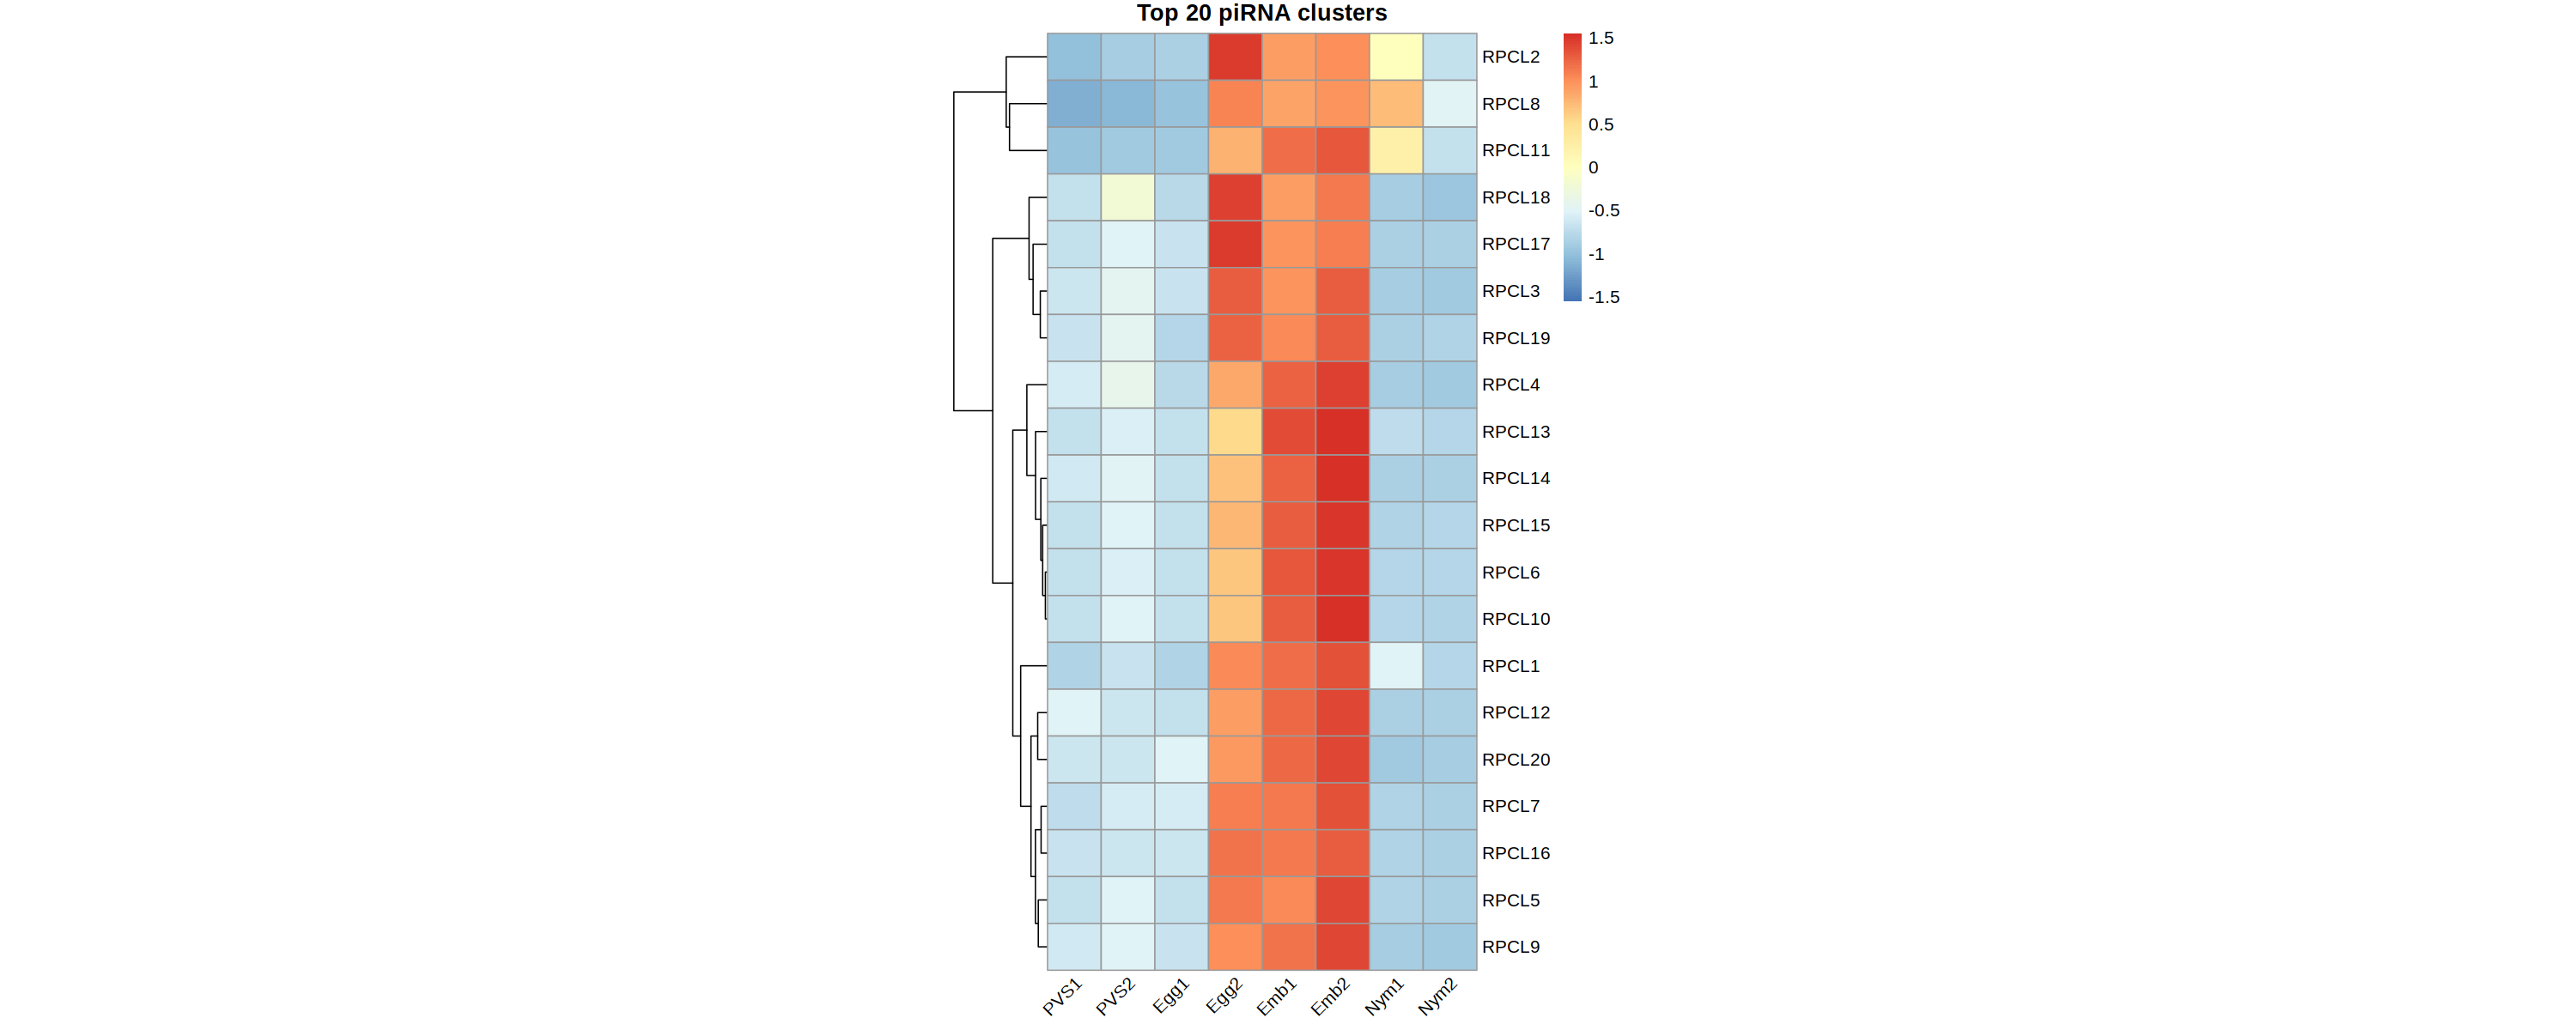

In [13]:
p2 <- pheatmap(cl_norm_mat[c(1:20),],
         main = "Top 20 piRNA clusters",
         show_rownames = TRUE,
         cluster_cols = FALSE,
         cluster_rows = TRUE,
         scale = "row",
         cellwidth = 30,
        #  color = turbo(50),
         silent = TRUE,
         # breaks = c(-2,0,2),
         labels_col = c("PVS1", "PVS2", "Egg1", "Egg2", "Emb1", "Emb2", "Nym1", "Nym2"),
         angle_col = 45)
print(p2)
png("images/heatmap_cluster_top20.png")
print(p2)
dev.off()

## Cumulative analysis

In [14]:
samples <- clusters %>% 
    select(pvs1, pvs2, egg1, egg2, emb1, emb2, nym1, nym2) %>% 
    names

clusters_cumulative <- clusters
for (i in samples){   
    cumulative <- 0
    vec_pct <- c()
    sample_values <- clusters[i] %>% pull
    sorted <- sort(sample_values, decreasing=TRUE)
    total <- sum(sample_values)
    for (j in 1:length(sorted)){
        current_value  <- sorted[j]
        cumulative <- cumulative + current_value
        pct <- (cumulative * 100) / total
        vec_pct <- c(vec_pct, pct)
    }
    clusters_cumulative[i] <- vec_pct
}

clusters_cumulative <- clusters_cumulative %>% 
    mutate(num_cluster = seq(1, length(sorted))) %>% 
    pivot_longer(cols = c("pvs1", "pvs2", "egg1", "egg2", "emb1", "emb2", "nym1", "nym2"), 
                 names_to = "sample",
                 values_to = "pct") %>% 
    select(sample, pct, num_cluster)

png 
  2

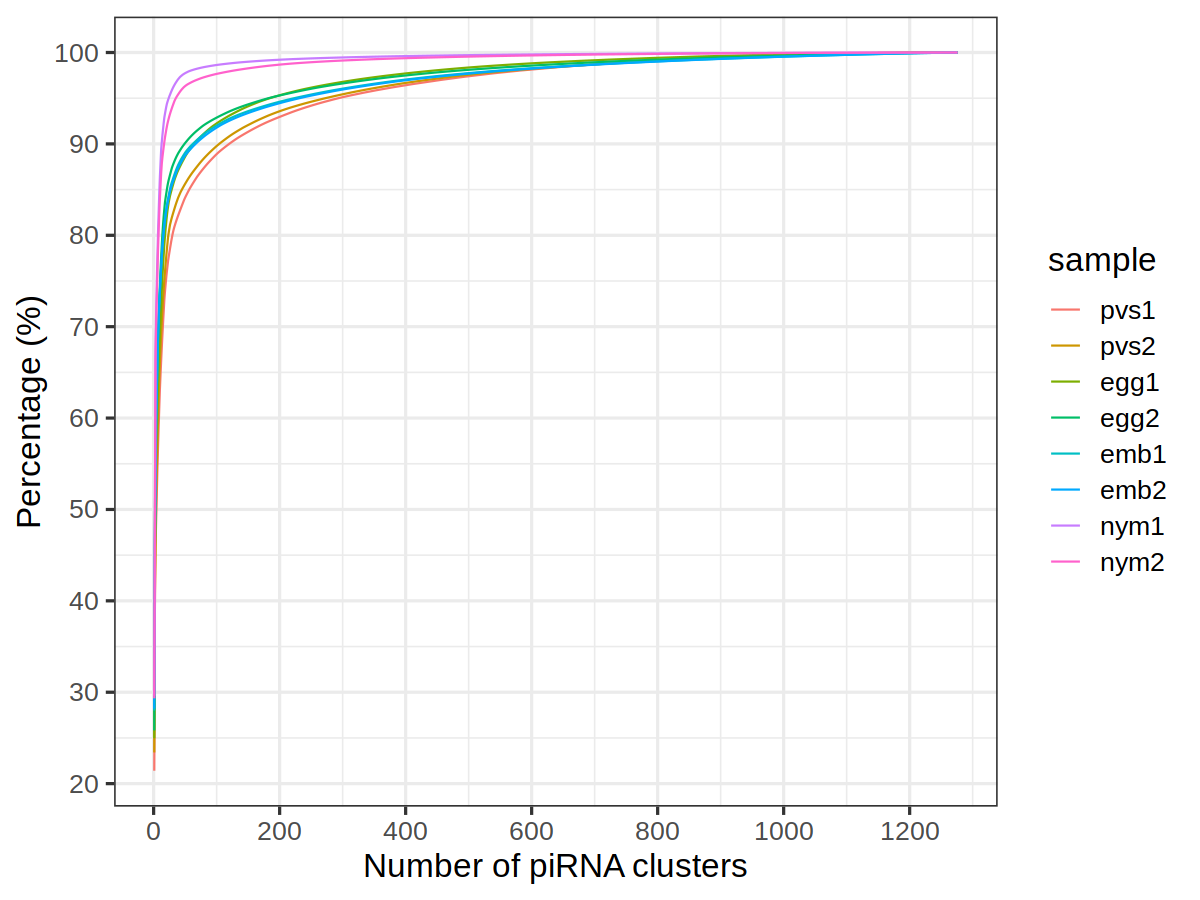

In [15]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 150)


clusters_cumulative$sample <- factor(clusters_cumulative$sample, levels = samples)
p3 <- ggplot(clusters_cumulative, aes(num_cluster, pct, color = sample)) +
    geom_line() +
    theme_bw(base_size = 16) +
    scale_y_continuous(breaks = seq(0,100,10)) +
    scale_x_continuous(breaks = seq(0,1800,200)) +
    # scale_x_log10() +
    labs(x = "Number of piRNA clusters", y = "Percentage (%)")
print(p3)
png("images/cumulative_plot.png", width=600, height=400)
print(p3)
dev.off()

png 
  2

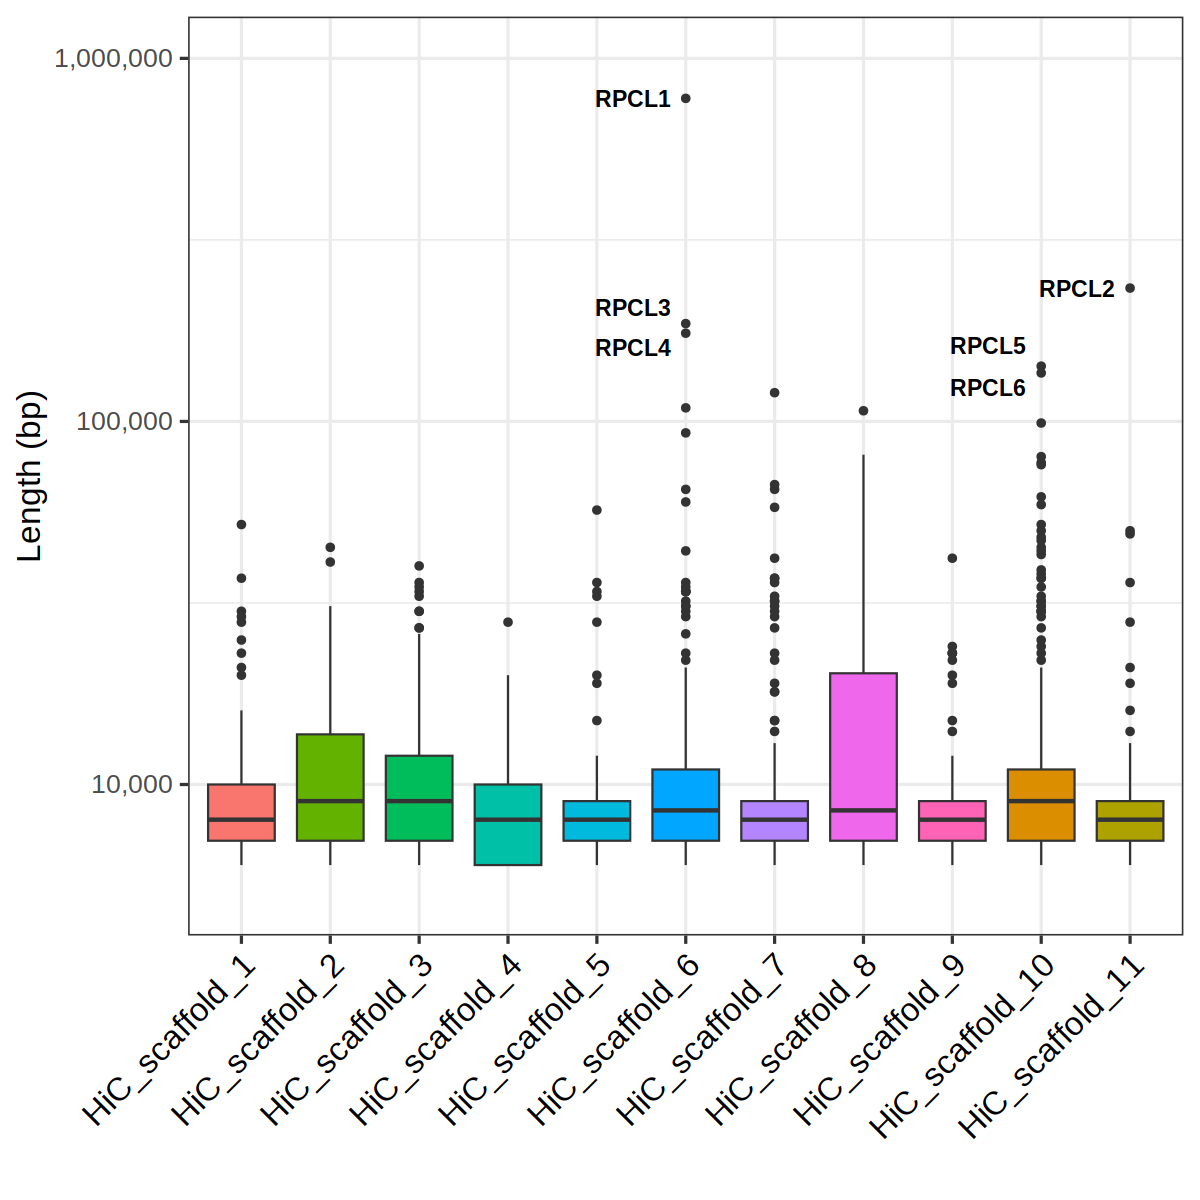

In [16]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 150)

chrs <- c()
for (i in seq(1,11)){
    chrs <- c(chrs, paste0("HiC_scaffold_", i))
}

chr_mean <- c()
chr_sd <- c()
for (i in chrs){
    lengths <- clusters %>% filter(chr == i) %>% select(length) %>% pull
    stdev <- sd(lengths)
    lmean <- mean(lengths)
    chr_mean <- c(chr_mean, lmean)
    chr_sd <- c(chr_sd, stdev)
}

cl_chr_lens <- data.frame("chr" = chrs, "mean_len" = chr_mean, "sd_len" = chr_sd)

# ggplot(cl_chr_lens, aes(chr, mean_len)) +
#     geom_col() +
#     geom_errorbar(aes(ymax=mean_len+sd_len, ymin=mean_len))

clusters_filt <- clusters %>% 
    filter(chr %in% chrs) %>% 
    rowwise %>% 
    mutate(lengthkb=length/1000) %>% 
    mutate(idx=strsplit(chr, "_")[[1]][3] %>% as.numeric) %>% 
    mutate(pos=case_when(name == "RPCL3" ~ length + 20000,
                         name == "RPCL4" ~ length - 15000,
                         name == "RPCL5" ~ length + 20000,
                         name == "RPCL6" ~ length - 12000,
                         TRUE ~ length))

p5 <- ggplot(clusters_filt, mapping = aes(x = fct_reorder(chr,idx), y = length, fill = chr)) +
    geom_boxplot(show.legend = FALSE) +
    scale_y_log10(labels = scales::comma,
                       limits = c(5000,1000000),
                       breaks = c(10000, 100000, 1000000)) +
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size=16, color = "black")) +
    xlab("") + ylab("Length (bp)") +
    geom_text(data = clusters_filt %>% filter(length > 130000),
              # check_overlap = TRUE,
              mapping = aes(chr, pos, label = name),
              vjust=0.5, hjust=1.2, show.legend = FALSE, fontface = "bold")
print(p5)
png("images/boxplot_cluster_size_chr.png")
print(p5)
dev.off()

# ggplot(clusters, aes(x = length)) + geom_histogram(bins = 200)

In [17]:
cl_tes <- list()
for (i in clusters_TEs_files){
    path <- str_split(i, "/")[[1]]
    cluster <- str_split(path[length(path)], "\\.")[[1]][1]
    tab <- suppressMessages(read_tsv(i, col_names = c("te", "count"))) %>% 
        mutate(cluster=cluster)
    cl_tes[[cluster]] <- tab
}
cl_tes <- bind_rows(cl_tes)

In [18]:
cl_tes_mat <- cl_tes %>% 
    mutate(idx=str_replace(cluster, "RPCL","") %>% as.numeric) %>% 
    arrange(idx) %>%
    select(-idx) %>% 
    pivot_wider(names_from=cluster, values_from=count) %>% 
    column_to_rownames("te")
cl_tes_mat[is.na(cl_tes_mat)] <- 1
cl_tes_mat

,RPCL1,RPCL2,RPCL3,RPCL4,RPCL5,RPCL6,RPCL7,RPCL8,RPCL9,RPCL10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DNA/hAT-hAT19,6,3,6,1,1,2,2,1,3,1
LINE/L1,1,1,1,1,1,1,1,1,1,1
DNA/TcMar-Tc1,26,18,17,22,8,9,1,6,15,11
LINE,1,1,2,1,1,1,1,1,3,1
LINE/I,26,4,22,15,16,15,7,1,7,22
LINE/L2,1,1,1,1,3,1,1,1,1,1
LTR/Gypsy,34,18,7,1,3,8,1,3,2,1
DNA,9,4,1,2,1,1,1,1,1,1
DNA/hAT-Ac,4,3,2,1,1,2,1,3,2,1


png 
  2

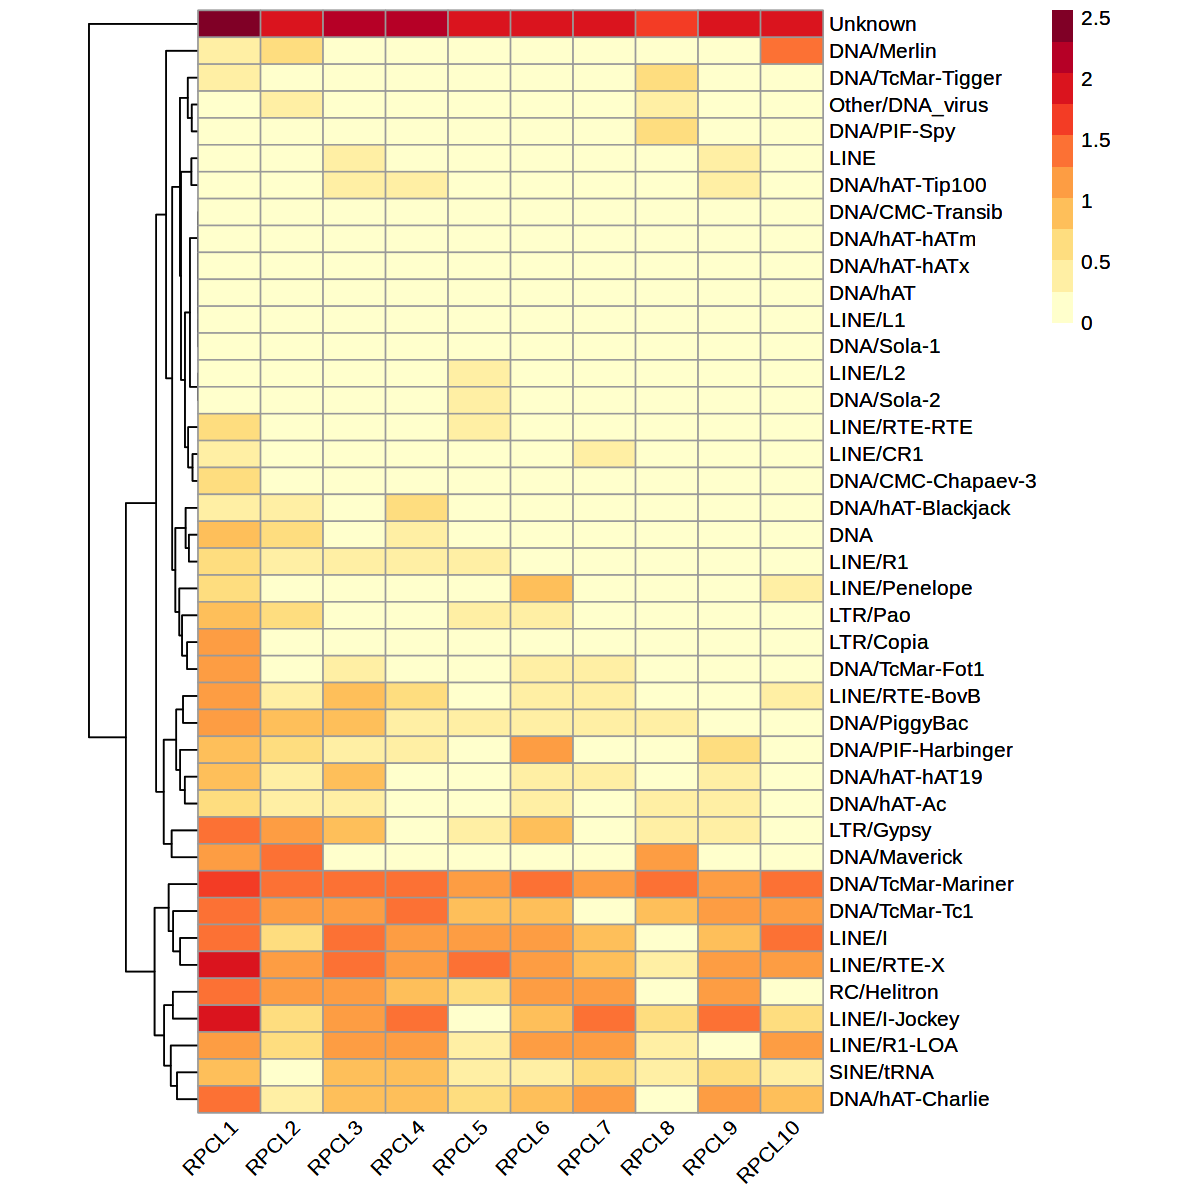

In [19]:
p8 <- pheatmap(cl_tes_mat %>% log10,
         # main = "Top 10 piRNA clusters",
         show_rownames = TRUE,
         cluster_cols = FALSE,
         cluster_rows = TRUE,
         # scale = "column",
         cellwidth = 30,
         color = colorRampPalette(brewer.pal(9,'YlOrRd'))(10),
         # silent = TRUE,
         # breaks = seq(0, 5, 1),
         # labels_col = c("PVS1", "PVS2", "Egg1", "Egg2", "Emb1", "Emb2", "Nym1", "Nym2"),
         angle_col = 45)
print(p8)
png("images/heatmap_topclusters_TEs.png", height=600, width=800)
print(p8)
dev.off()

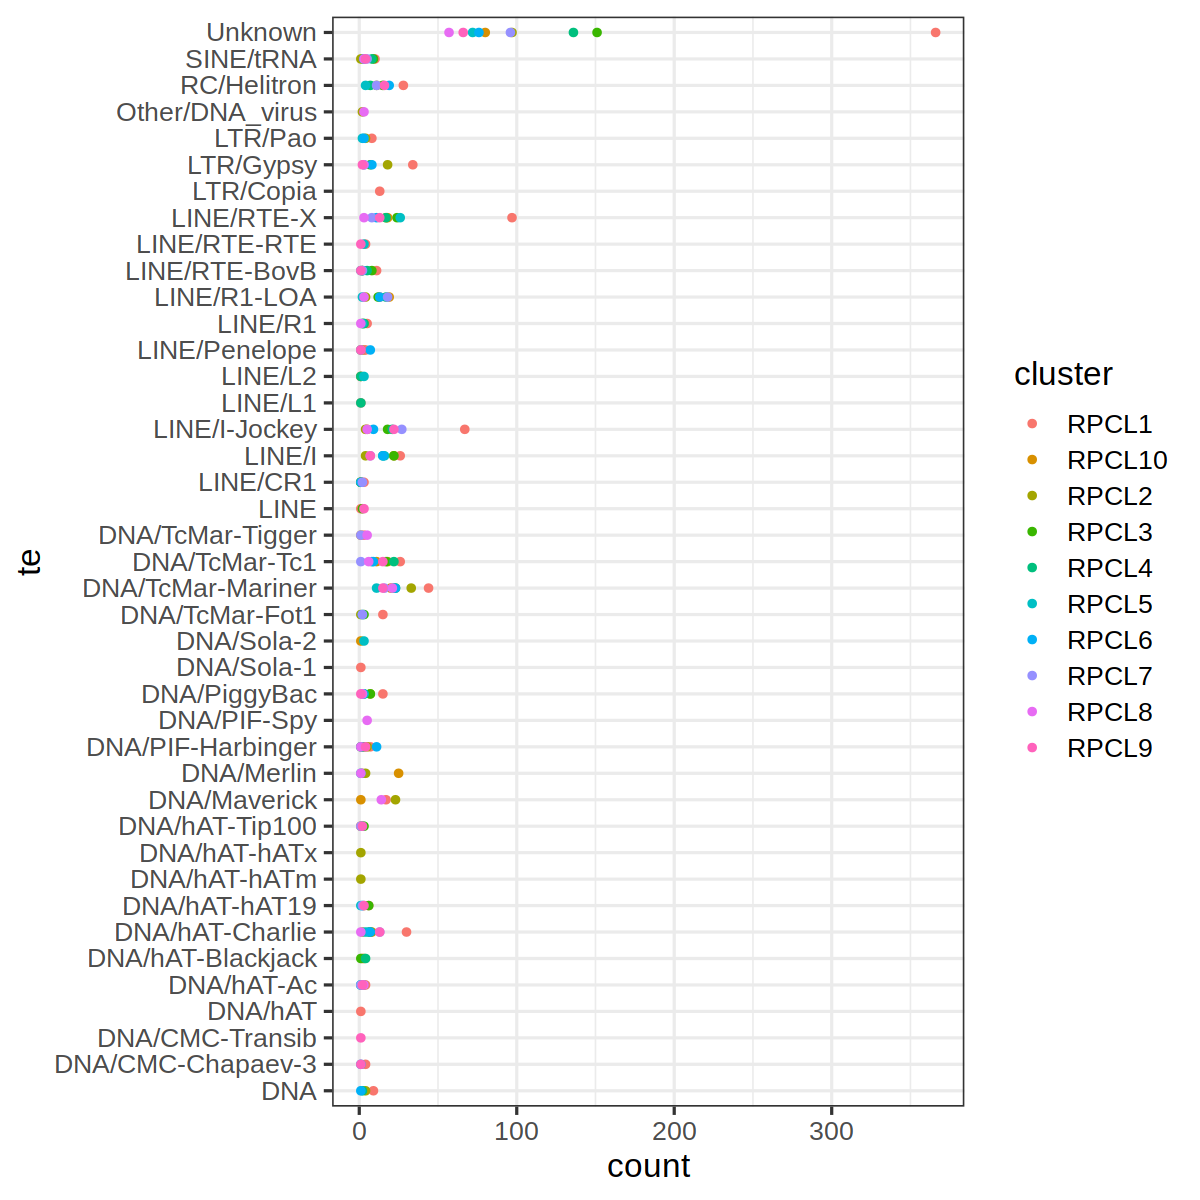

In [20]:
ggplot(cl_tes, aes(count, te, color = cluster)) + geom_point() + theme_bw(base_size=16)

In [21]:
#basedir <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/"
#overlap_file <- paste0(basedir, "clusters.overlap.tsv")
#outfile <- "plot.png"


overlap_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.overlap.tsv"
# outfile <- snakemake@output[[1]]
overlap <- read_tsv(overlap_file)


overlap_fmt <- as.data.frame(overlap)

samples <- c("pvs1", "pvs2", "egg1", "egg2", "emb1", "emb2", "nym1", "nym2")
for (i in samples){
    overlap_fmt[i] <- ifelse(overlap_fmt[i] == 0, 0, 1)
}

samples

Rows: 1276 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): chr
dbl (10): start, end, pvs1, pvs2, egg1, egg2, emb1, emb2, nym1, nym2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "pvs1" "pvs2" "egg1" "egg2" "emb1" "emb2" "nym1" "nym2"

In [22]:
# png(outfile, width = 800)
upset(overlap_fmt)
# dev.off()

ERROR: Error in xj[i, , drop = FALSE]: subscript out of bounds
